In [78]:
import pandas as pd
import numpy as np

import seaborn as sbn
sbn.set(style='ticks', font_scale=1.5)

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import os

In [5]:
df990 = pd.read_csv('../processed_data/U2OS_CS_DNase_990.csv', header=0)
df991 = pd.read_csv('../processed_data/U2OS_CS_DNase_991.csv', header=0)

In [32]:
dpm990 = df990.loc[(df990['normed_sumCov']>0) & (df991['normed_sumCov']>0), 'normed_sumCov']
dpm991 = df991.loc[(df990['normed_sumCov']>0) & (df991['normed_sumCov']>0), 'normed_sumCov']

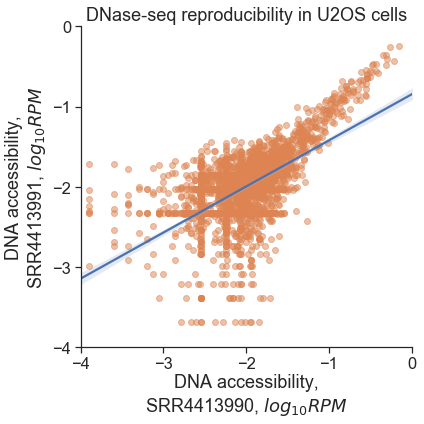

In [88]:
if not os.path.exists('../processed_data/20190726'):
    os.mkdir('../processed_data/20190726')

fig, ax = plt.subplots(1,1, figsize=(6,6))

cols = sbn.color_palette()
sbn.regplot(dpm990.map(np.log10), dpm991.map(np.log10), 
            scatter_kws={'alpha': 0.5,
                         'color': cols[1]})
ax.set_title('DNase-seq reproducibility in U2OS cells')
ax.set_xlabel('DNA accessibility,\nSRR4413990, $log_{10}RPM$')
ax.set_ylabel('DNA accessibility,\nSRR4413991, $log_{10}RPM$')
ax.set_yticks(np.arange(-4,1,1))
ax.set_xlim(-4,0)
ax.set_ylim(-4,0)
sbn.despine()
fig.tight_layout()
fig.savefig('../processed_data/20190726/U2OS.dnaseseq.reproduce.png', dpi=300)

In [63]:
stats.pearsonr(dpm990.map(np.log10), dpm991.map(np.log10))

(0.61613787193588998, 2.8769963200081681e-277)

In [15]:
df50 = pd.read_csv('../processed_data/HEK_CS_DNase_50bp.csv', header=0)
df36 = pd.read_csv('../processed_data/HEK_CS_DNase_36bp.csv', header=0)

In [64]:
dpm50 = df50.loc[(df50['normed_sumCov']>0) & (df36['normed_sumCov']>0), 'normed_sumCov']
dpm36 = df36.loc[(df50['normed_sumCov']>0) & (df36['normed_sumCov']>0), 'normed_sumCov']

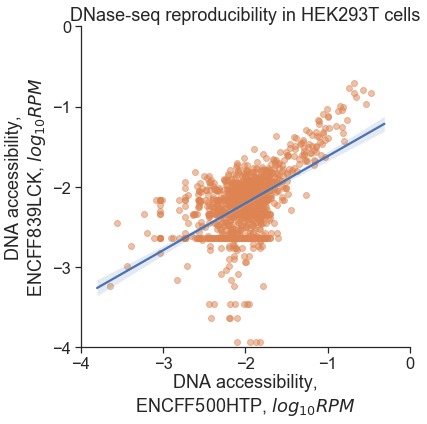

In [86]:
if not os.path.exists('../processed_data/20190726'):
    os.mkdir('../processed_data/20190726')

fig, ax = plt.subplots(1,1, figsize=(6,6))

cols = sbn.color_palette()
sbn.regplot(dpm50.map(np.log10), dpm36.map(np.log10), 
            scatter_kws={'alpha': 0.5,
                         'color': cols[1]})
ax.set_title('DNase-seq reproducibility in HEK293T cells')
ax.set_xlabel('DNA accessibility,\nENCFF500HTP, $log_{10}RPM$')
ax.set_ylabel('DNA accessibility,\nENCFF839LCK, $log_{10}RPM$')
ax.set_yticks(np.arange(-4,1,1))
ax.set_xlim(-4,0)
ax.set_ylim(-4,0)

sbn.despine()
fig.tight_layout()
fig.savefig('../processed_data/20190726/HEK293T.dnaseseq.reproduce.png', dpi=300)

In [83]:
stats.pearsonr(dpm50.map(np.log10), dpm36.map(np.log10))

(0.57505394038117674, 6.9648596960007514e-99)

In [3]:
dfC = pd.read_csv('../processed_data/20181216_CIRCLE_sup_data_RPM_clean.csv', index_col=0)
dfC.head()

,chr,bStart,bEnd,name,read_count,start,stop,target_name,gRNA_seq,offsite_seq,...,sumCov,normed_read_count,normed_sumCov,MIT,CFD,Kinetic,totalReadCount,RPM,trc_guide,cpm
0,10,100020202,100020252,10:100020222-100020245,532,100020222,100020245,U2OS_combined_VEGFA_site_2,GACCCCCTCCACCCCGCCTCNGG,GCCCCCCCACCCCCCGCCCCCGG,...,119,0.001491,0.029758,0.106818,0.074314,2.422566e-09,3825656,0.000139,11449328,464.656092
1,10,100170317,100170367,10:100170324-100170347,40,100170324,100170347,U2OS_combined_VEGFA_site_2,GACCCCCTCCACCCCGCCTCNGG,AAGGGCCCCCACCCCGCCCCAGG,...,31,0.000112,0.007752,0.310590,0.037241,1.472477e-08,3825656,0.000010,11449328,34.936548
2,10,101904492,101904542,10:101904499-101904522,28,101904499,101904522,U2OS_combined_VEGFA_site_2,GACCCCCTCCACCCCGCCTCNGG,TTCCCTCTCCTCCCAGCCTCAGG,...,46,0.000078,0.011503,0.089988,0.046176,3.881172e-06,3825656,0.000007,11449328,24.455584
3,10,102729232,102729282,10:102729239-102729262,74,102729239,102729262,U2OS_combined_VEGFA_site_2,GACCCCCTCCACCCCGCCTCNGG,CCCCCCCCCCGCCCCGCCTCCAG,...,415,0.000207,0.103779,0.000000,0.094577,0.000000e+00,3825656,0.000019,11449328,64.632614
4,10,102821493,102821543,10:102821500-102821523,388,102821500,102821523,U2OS_combined_VEGFA_site_2,GACCCCCTCCACCCCGCCTCNGG,CTACCCCCACTCCCCGCCTCCGG,...,237,0.001087,0.059266,0.334358,0.118738,1.945703e-02,3825656,0.000101,11449328,338.884518


In [27]:
dfG[dfG['sumCov']>0].pivot_table(index='target_name', columns='Mismatches', aggfunc='size', fill_value=0).to_csv('../processed_data/20190430_GUIDESeq_freq_table.csv')

In [25]:
dfC[dfC['sumCov']>0].pivot_table(index='target_name', columns='Mismatches', aggfunc='size', fill_value=0).to_csv('../processed_data/20190430_CIRCLESeq_freq_table.csv')

In [14]:
dfC.columns

Index(['chr', 'bStart', 'bEnd', 'name', 'read_count', 'start', 'stop',
       'target_name', 'gRNA_seq', 'offsite_seq', 'Mismatches', 'sumCov',
       'normed_read_count', 'normed_sumCov', 'MIT', 'CFD', 'Kinetic',
       'totalReadCount', 'RPM', 'trc_guide', 'cpm'],
      dtype='object')

In [31]:
dfG['target_name'].value_counts()

VEGFA_site2    152
HEKgRNA4       135
VEGFA_site3     67
VEGFA_site1     22
EMX1            16
HEKgRNA1        10
FANCF            8
HEKgRNA3         6
HEKgRNA2         3
RNF2             1
Name: target_name, dtype: int64